# Trying CNN for modeling here with SMOTE



In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification, make_regression
from sklearn.metrics import classification_report , confusion_matrix ,plot_confusion_matrix

import matplotlib.pyplot as plt
import pickle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation, Flatten, Dropout
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical 
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score

from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from tensorflow.keras.regularizers import l2
from keras.callbacks import EarlyStopping

from imblearn.over_sampling import SMOTE
import pickle

%matplotlib inline

In [2]:
#feature_df = pd.read_csv('../Data/Data_and_Features.csv')

In [3]:
#using pickled df from previous file to preserve data and data types as CSV is modifying the data types 
feature_df=pd.read_pickle('Data_And_Features.pkl')

In [4]:
feature_df.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Accent,...,853,854,855,856,857,858,859,860,861,Accent_num
0,19.0,9.0,"shady grove, maryland, usa",arabic38,arabic,female,1394,usa,False,American,...,-22.414141,-19.780674,-20.364351,-26.178616,-26.259825,-26.722843,-23.242558,-20.390944,-16.448463,1
1,32.0,12.0,"fort collins, colorado, usa",arabic45,arabic,female,1456,usa,False,American,...,-13.328942,-13.913136,-14.347802,-15.178201,-15.032391,-15.780533,-17.877295,-10.750269,-5.102596,1
2,19.0,3.0,"washington, district of columbia, usa",arabic78,arabic,female,1897,usa,False,American,...,-32.267937,-34.579670,-37.915585,-37.576115,-33.534348,-29.363533,-25.490492,-22.864353,-19.428410,1
3,43.0,40.0,"jianchuan, yunnan, china",bai1,bai,female,28,china,False,Chinese,...,-44.022732,-44.022732,-44.022732,-44.022732,-44.022732,-44.022732,-44.022732,-44.022732,-44.022732,2
4,34.0,3.5,"durgapur, west bengal, india",bengali11,bengali,male,1018,india,False,Indian,...,-4.014865,-4.399039,-7.001354,-11.521073,-10.343769,-8.018362,-7.545074,-10.307240,-11.671057,3


In [5]:
feature_df.shape

(791, 873)

In [6]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Columns: 873 entries, age to Accent_num
dtypes: bool(1), float64(864), int64(2), object(6)
memory usage: 5.3+ MB


In [7]:
features=range(0,784)

In [8]:
features

range(0, 784)

In [9]:
X=feature_df[features]
y=feature_df['Accent_num']

In [10]:
#X=np.array(X)

In [11]:
#X[0].shape

In [12]:
#X.shape

In [13]:
y.value_counts()

1    433
2    221
3    137
Name: Accent_num, dtype: int64

In [14]:
type(X)

pandas.core.frame.DataFrame

In [15]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y )

In [16]:
X_train.shape

(553, 784)

In [17]:
X_train[0].shape

(553,)

In [18]:
#rows = X_train[0].shape[0]
#cols = X_train[0].shape[1]
#rows 

In [19]:
y_train.value_counts()

1    303
2    154
3     96
Name: Accent_num, dtype: int64

# Trying SMOTE oversampling technic to try and balance the data

In [20]:
sm=SMOTE()

In [21]:
Xsm_train , ysm_train = sm.fit_sample(X_train , y_train)

In [22]:
type(Xsm_train)

pandas.core.frame.DataFrame

In [23]:
type(ysm_train)

pandas.core.series.Series

In [24]:
print(pd.Series(ysm_train).value_counts())

3    303
2    303
1    303
Name: Accent_num, dtype: int64


In [25]:
Xsm_train=np.array(Xsm_train)

In [26]:
Xsm_train.shape

(909, 784)

In [27]:
Xsm_train[0].shape

(784,)

In [28]:
X_test=np.array(X_test)

In [29]:
#rows = X_train[0].shape[0]
#cols = X_train[0].shape[1]
#rows 

In [30]:
X_train=Xsm_train.reshape(Xsm_train.shape[0],28,28)

In [31]:
X_test=X_test.reshape(X_test.shape[0],28,28)

Train: X=(909, 28, 28), y=(553,)
Test: X=(238, 28, 28), y=(238,)


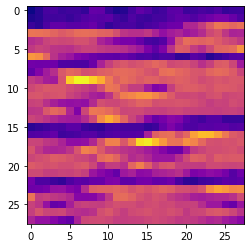

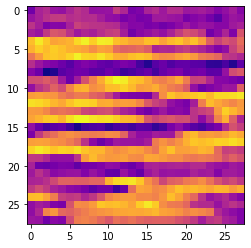

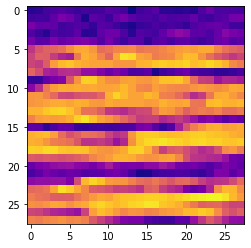

In [32]:
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

# plot first few images

for i in range(3):
    
# plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('plasma'))
# show the figure
    plt.show()

In [33]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [34]:
X_train[0]

array([[-0.1265163 , -0.11947132, -0.10949759, -0.10870349, -0.11381982,
        -0.11176246, -0.11156242, -0.11575475, -0.09902835, -0.09929239,
        -0.1153036 , -0.12246849, -0.1206795 , -0.11037698, -0.10038524,
        -0.10528675, -0.11411802, -0.1112444 , -0.10225241, -0.10201324,
        -0.11284667, -0.11187733, -0.1089025 , -0.11124761, -0.10675991,
        -0.11499482, -0.11272328, -0.11223192],
       [-0.12197392, -0.1194142 , -0.11107749, -0.11178077, -0.11137064,
        -0.11451935, -0.11046054, -0.10540321, -0.10234459, -0.10430402,
        -0.10197657, -0.11090949, -0.11467908, -0.10666274, -0.11190069,
        -0.11384599, -0.10980308, -0.11008009, -0.10429161, -0.09979478,
        -0.10151893, -0.10600594, -0.09944069, -0.09514348, -0.08960707,
        -0.09020317, -0.09760015, -0.10693713],
       [-0.11331835, -0.11816739, -0.10790652, -0.0994451 , -0.09972574,
        -0.10310192, -0.10222299, -0.10126359, -0.09747977, -0.10597859,
        -0.11594111, -0.1113

In [35]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [36]:
X_train.shape , X_test.shape

((909, 28, 28, 1), (238, 28, 28, 1))

In [37]:
X_train[0].shape

(28, 28, 1)

In [38]:
y_test_original=y_test

In [39]:
y_test_original

285    1
549    2
350    1
91     1
725    3
      ..
180    1
185    1
664    2
755    1
639    2
Name: Accent_num, Length: 238, dtype: int64

In [40]:
y_test_original.value_counts()

1    130
2     67
3     41
Name: Accent_num, dtype: int64

In [41]:
ysm_train

0      3
1      3
2      2
3      1
4      3
      ..
904    3
905    3
906    3
907    3
908    3
Name: Accent_num, Length: 909, dtype: int64

In [42]:
y_train=np_utils.to_categorical(ysm_train,4)
y_test=np_utils.to_categorical(y_test,4)

In [43]:
y_train.shape

(909, 4)

In [44]:
y_test.shape

(238, 4)

In [45]:
y_train.shape , y_test.shape

((909, 4), (238, 4))

In [46]:
y_train

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [47]:
y_test

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],


In [48]:
type(X_train)

numpy.ndarray

In [49]:
type(y_train)

numpy.ndarray

In [50]:
type(y_test)

numpy.ndarray

# CNN model for classification

In [51]:
cnn=Sequential()

In [52]:
cnn.add(Conv2D(filters = 4,
               kernel_size=(3,3),
               activation='relu',
               input_shape=(28,28,1)))

In [53]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [54]:
cnn.add(Flatten())

# Add a densely-connected layer with 128 neurons.
cnn.add(Dense(128,activation ='relu'))
cnn.add(Dense(64,activation ='relu'))


# Add output layer with 10 neurons.
cnn.add(Dense(4,activation='softmax'))

# compiler
cnn.compile(loss='categorical_crossentropy',
           optimizer = 'adam',
            metrics = ['accuracy']
           )

In [55]:
history = cnn.fit(X_train,
              y_train,
              batch_size=50,
              epochs=100,
              validation_data = (X_test, y_test),
              verbose=1)

Epoch 1/100
19/19 [==============================] - 0s 26ms/step - loss: 1.2213 - accuracy: 0.3256 - val_loss: 1.0766 - val_accuracy: 0.5378
Epoch 2/100
19/19 [==============================] - 0s 12ms/step - loss: 1.0951 - accuracy: 0.3773 - val_loss: 1.0641 - val_accuracy: 0.3151
Epoch 3/100
19/19 [==============================] - 0s 12ms/step - loss: 1.1039 - accuracy: 0.3465 - val_loss: 1.1180 - val_accuracy: 0.2899
Epoch 4/100
19/19 [==============================] - 0s 10ms/step - loss: 1.0720 - accuracy: 0.4730 - val_loss: 1.0392 - val_accuracy: 0.5588
Epoch 5/100
19/19 [==============================] - 0s 10ms/step - loss: 1.0642 - accuracy: 0.4202 - val_loss: 1.0607 - val_accuracy: 0.4244
Epoch 6/100
19/19 [==============================] - 0s 10ms/step - loss: 1.0469 - accuracy: 0.4983 - val_loss: 1.0231 - val_accuracy: 0.5420
Epoch 7/100
19/19 [==============================] - 0s 9ms/step - loss: 1.0227 - accuracy: 0.5050 - val_loss: 1.0440 - val_accuracy: 0.3824
Epoch 8

19/19 [==============================] - 0s 11ms/step - loss: 0.3409 - accuracy: 0.8878 - val_loss: 1.3745 - val_accuracy: 0.5084
Epoch 59/100
19/19 [==============================] - 0s 11ms/step - loss: 0.3483 - accuracy: 0.8878 - val_loss: 1.2021 - val_accuracy: 0.6050
Epoch 60/100
19/19 [==============================] - 0s 10ms/step - loss: 0.3272 - accuracy: 0.9021 - val_loss: 1.2764 - val_accuracy: 0.5462
Epoch 61/100
19/19 [==============================] - 0s 9ms/step - loss: 0.3256 - accuracy: 0.8999 - val_loss: 1.2087 - val_accuracy: 0.6218
Epoch 62/100
19/19 [==============================] - 0s 10ms/step - loss: 0.2997 - accuracy: 0.9142 - val_loss: 1.2417 - val_accuracy: 0.5798
Epoch 63/100
19/19 [==============================] - 0s 10ms/step - loss: 0.2848 - accuracy: 0.9197 - val_loss: 1.2426 - val_accuracy: 0.6050
Epoch 64/100
19/19 [==============================] - 0s 11ms/step - loss: 0.2712 - accuracy: 0.9164 - val_loss: 1.3087 - val_accuracy: 0.5798
Epoch 65/100


# Train and Test Loss with CNN

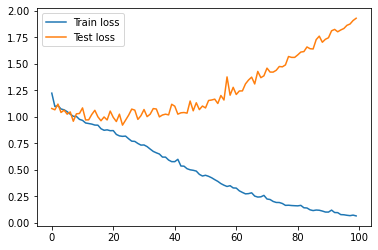

In [56]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();

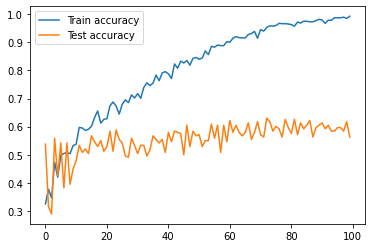

In [57]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.legend();

In [58]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_loss = history.history['val_loss']
test_acc = history.history['val_accuracy']

df = pd.DataFrame(list(zip(train_acc, test_acc, train_loss, test_loss)), 
               columns =['train_acc', 'test_acc', 'train_loss', 'test_loss']) 

df['accuracy_diff'] = df['train_acc'] - df['test_acc']
df['loss_diff'] = df['train_loss'] - df['test_loss']

df.tail()

,train_acc,test_acc,train_loss,test_loss,accuracy_diff,loss_diff
95,0.986799,0.596639,0.073999,1.831155,0.390160,-1.757156
96,0.986799,0.596639,0.069206,1.861179,0.390160,-1.791973
97,0.988999,0.584034,0.065639,1.873444,0.404965,-1.807805
98,0.984598,0.617647,0.070782,1.906474,0.366951,-1.835692
99,0.992299,0.563025,0.063131,1.928023,0.429274,-1.864891


In [59]:
y_pred=cnn.predict(X_test)

In [60]:
y_pred=np.argmax(y_pred,axis=1)

In [61]:
cnf=confusion_matrix(y_test_original, y_pred)

In [62]:
target_names=['American','Chinies','Indian']

print(classification_report(y_test_original, y_pred, 
 target_names=target_names))

              precision    recall  f1-score   support

    American       0.72      0.60      0.65       130
     Chinies       0.49      0.54      0.51        67
      Indian       0.36      0.49      0.41        41

    accuracy                           0.56       238
   macro avg       0.52      0.54      0.53       238
weighted avg       0.59      0.56      0.57       238



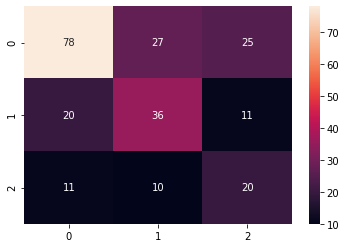

In [63]:
sns.heatmap(cnf,annot=True)

# Adding regularization to the CNN model

In [115]:
cnn2 = Sequential()

cnn2.add(Conv2D(filters = 6,            
                     kernel_size = (3, 3),       
                     activation='relu',     
                     input_shape=(28,28,1))) 


cnn2.add(MaxPooling2D(pool_size=(2,2))) 

#cnn2.add(Conv2D(16,
#                     kernel_size = (3, 3),
 #                    activation='relu'))

#cnn2.add(MaxPooling2D(pool_size=(2,2)))

cnn2.add(Flatten())  

cnn2.add(Dense(128, activation='relu'))  

###Add dropout 

cnn2.add(Dropout(0.05))

cnn2.add(Dense(64, activation = 'relu'))

###add dropout
cnn2.add(Dropout(0.05))

cnn2.add(Dense(4, activation='softmax'))   

cnn2.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [116]:
early_stop = EarlyStopping(monitor='val_loss', min_delta=0 , patience = 10)

In [117]:
history = cnn2.fit(X_train,
              y_train,
              batch_size=500,
              epochs=150,
              validation_data = (X_test, y_test),
             callbacks=[early_stop],
              verbose=1)

Epoch 1/150
2/2 [==============================] - 0s 71ms/step - loss: 1.3693 - accuracy: 0.3289 - val_loss: 1.3190 - val_accuracy: 0.3782
Epoch 2/150
2/2 [==============================] - 0s 25ms/step - loss: 1.3084 - accuracy: 0.3575 - val_loss: 1.2492 - val_accuracy: 0.5126
Epoch 3/150
2/2 [==============================] - 0s 23ms/step - loss: 1.2466 - accuracy: 0.3388 - val_loss: 1.1845 - val_accuracy: 0.5462
Epoch 4/150
2/2 [==============================] - 0s 26ms/step - loss: 1.1942 - accuracy: 0.3421 - val_loss: 1.1278 - val_accuracy: 0.5462
Epoch 5/150
2/2 [==============================] - 0s 25ms/step - loss: 1.1577 - accuracy: 0.3322 - val_loss: 1.0896 - val_accuracy: 0.5462
Epoch 6/150
2/2 [==============================] - 0s 26ms/step - loss: 1.1267 - accuracy: 0.3454 - val_loss: 1.0825 - val_accuracy: 0.5462
Epoch 7/150
2/2 [==============================] - 0s 28ms/step - loss: 1.1170 - accuracy: 0.3113 - val_loss: 1.0994 - val_accuracy: 0.2899
Epoch 8/150
2/2 [===

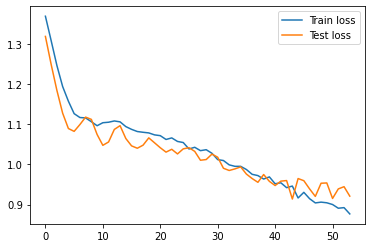

In [118]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();

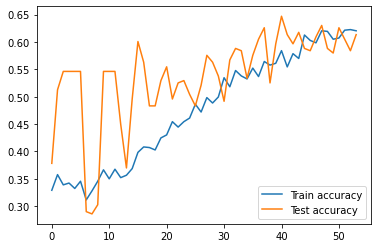

In [119]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.legend();

In [141]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_loss = history.history['val_loss']
test_acc = history.history['val_accuracy']

df = pd.DataFrame(list(zip(train_acc, test_acc, train_loss, test_loss)), 
               columns =['train_acc', 'test_acc', 'train_loss', 'test_loss']) 

df['accuracy_diff'] = df['train_acc'] - df['test_acc']
df['loss_diff'] = df['train_loss'] - df['test_loss']

df.tail()

,train_acc,test_acc,train_loss,test_loss,accuracy_diff,loss_diff
49,0.605061,0.579832,0.904597,0.954042,0.025229,-0.049445
50,0.607261,0.626050,0.900303,0.915412,-0.018790,-0.015109
51,0.621562,0.605042,0.891079,0.939166,0.016520,-0.048087
52,0.622662,0.584034,0.892522,0.944701,0.038629,-0.052179
53,0.620462,0.613445,0.876894,0.921159,0.007017,-0.044265


In [120]:
cnn2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 6)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1014)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               129920    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)               

In [121]:
y_pred2=cnn2.predict(X_test)

In [122]:
y_pred2=np.argmax(y_pred2,axis=1)

In [123]:
y_pred2

array([1, 1, 3, 1, 2, 1, 3, 3, 3, 2, 1, 2, 1, 1, 2, 3, 3, 3, 2, 3, 1, 1,
       3, 1, 1, 2, 3, 1, 1, 1, 1, 2, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1,
       2, 3, 2, 2, 1, 1, 1, 3, 2, 2, 3, 2, 1, 3, 1, 1, 2, 2, 1, 1, 1, 2,
       1, 2, 2, 1, 3, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 3, 3, 1,
       3, 3, 1, 3, 1, 1, 3, 1, 1, 2, 3, 2, 2, 3, 2, 3, 1, 2, 3, 1, 1, 2,
       1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 2, 1, 1, 3, 2, 1, 3, 2, 1, 1, 1, 1,
       2, 2, 1, 3, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 3, 1,
       2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 3, 2, 3, 2, 1, 1, 1, 3, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 3, 1, 2, 3, 1, 3, 1, 1, 1, 2, 1,
       1, 3, 1, 3, 3, 1, 1, 2, 3, 2, 1, 2, 1, 1, 2, 3, 3, 1, 1, 2, 2, 1,
       3, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2])

In [124]:
ls=list(zip(y_test_original,y_pred2))

In [125]:
ls1=[l for l in ls if l[0]==l[1]]
len(ls1)

146

In [126]:
cnf1=confusion_matrix(y_test_original, y_pred)

In [127]:
target_names=['American','Chinies','Indian']

In [128]:
print(classification_report(y_test_original, y_pred, 
 target_names=target_names))

              precision    recall  f1-score   support

    American       0.72      0.60      0.65       130
     Chinies       0.49      0.54      0.51        67
      Indian       0.36      0.49      0.41        41

    accuracy                           0.56       238
   macro avg       0.52      0.54      0.53       238
weighted avg       0.59      0.56      0.57       238



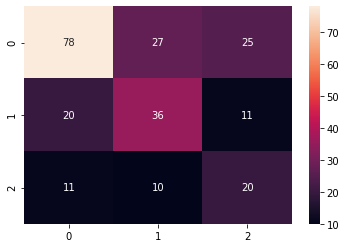

In [129]:
sns.heatmap(cnf1,annot=True)

In [130]:
#Pickle this model...

# Trying Prediction with 1 file

In [131]:
feature_df.loc[749]

age                                       25
age_onset                                  0
birthplace         panama city, panama (map)
filename                           english22
native_language                      english
                             ...            
858                                 -25.7746
859                                 -22.0206
860                                 -10.9953
861                                 -3.51731
Accent_num                                 1
Name: 749, Length: 873, dtype: object

In [132]:
new_X=feature_df.loc[749].iloc[10:794]

In [133]:
type(new_X)

pandas.core.series.Series

In [134]:
new_X=np.array(new_X)

In [135]:
new_X.shape

(784,)

In [136]:
#new_X=new_X.reshape(new_X.shape[0],28,28,1)

In [137]:
new_X=new_X.astype('float32')/255

In [138]:
new_X=new_X.reshape(1,28,28,1)

In [139]:
new_pred=cnn2.predict_classes([new_X,])

In [140]:
new_pred[0]

1